# Introduction to Bayesian Statistics


Lesson Goals

    Understand how conditional probabilities form the basis for Bayesian statistics.
    Introduce Bayes' Theorem and its components.
    Use Bayes' Theorem to arrive at an estimate.
    Perform a Bayesian analysis using a real-world scenario.

Introduction

In the Introduction to Probability lesson, we introduced conditional probability, which is a prerequisite for Bayesian Statistics.

Conditional Probabilities

A conditional probability is a probability based on some background information. It's notation is typically expressed as P(A|B), which means the probability of event A occurring given that some condition B is true. We saw that this could be computed using the following equation.

P(A|B) = P(A∩B) / P(B)

In other words, the probability of A given B equals the probability of the intersection of A and B divided by the probability of B.

We also briefly touched on the independence and dependence of events and said that when events are independent, at least one of the following must be true.

P(A|B) = P(A)
P(B|A) = P(B)
P(A∩B) = P(A) P(B)

In other words, if the events are truly independent, then the probability of one given another should just be the probability of that event occurring. Similarly, the probability of the intersection of the two events should just be the product of the probabilities of the two events, since neither one impacts the other.
Bayes' Theorem

For dependent events, we need to modify the last set of equations to account for the fact that one event impacts the other.

P(A∩B) = P(A) P(B|A)
P(B∩A) = P(B) P(A|B)

So the intersection of A and B equals the probability of A times the probability of B given A and, since there is nothing special about A versus B, it also equals the probability of B times the probability of A given B.

If this is the case, then:

P(B) P(A|B) = P(A) P(B|A)

And if we divide both sides by P(B), we end up with the following.

P(A|B) = P(A) P(B|A) / P(B)

This equation is known as Bayes' Theorem, and it is a surprisingly powerful equation that forms the fundamental idea behind all Bayesian statistics. It allows us to establish what we believe about the probability of a hypothesis prior to seeing any data, and it also provides us with a means by which to update those beliefs once we have seen some data.

This equation has a few different components, so let's break those down:

    P(A) is known as the prior probability, and it is the the probability of the hypothesis before we see the data.
    
    P(B|A) is known as the likelihood, and it represents the probability of the data under the hypothesis.
    
    P(B) is known as the marginal probability, and it is a normalizing constant that represents the probability of the data under any hypothesis, or P(A∪B). In other words, it can be computed as P(A) P(B|A) + P(-A) P(B|-A) where -A is Not A (the alternative scenario of the hypothesis).
    
    P(A|B) is known as the posterior probability, and it is the probability that we want to compute after having seen the data.

Important: It is important to emphasize here that the hypothesis is represented by A and the observed data is represented by B. A common mistake and point of confusion is to think that A and B represent two different hypotheses, which is not the case. The two opposing hypotheses are represented by A and -A.

We can define a function in Python that accepts a list of priors and corresponding likelihoods. Our function will compute the marginal (marg) and then use Bayes' Theorem to calculate the posterior probabilities for the each of the hypotheses (post).

In [2]:
import numpy as np

def bayes_rule(priors, likelihoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

# Application of Bayes' Theorem

Now that we have our function, let's propose a scenario and use our function to help us solve for the posterior probabilities.

Suppose we have 3 jars with 100 marbles in each.

    Jar 1 has 40 blue marbles, 30 red marbles, and 30 green marbles.
    Jar 2 has 60 blue marbles, 20 red marbles, and 20 green marbles.
    Jar 3 has 10 blue marbles, 30 red marbles, and 60 green marbles.

You pick a marble from one of the jars at random, and the marble is green. What are the probabilities that the marble came from each of the three jars?

To answer this question, we would need to know what our prior probabilities were and our likelihoods. For the priors, we can assume that the probability we drew the marble from any one jar is equally probably, or 1/3. The likelihoods in this case would just be the percentages of green marbles in each jar. We can plug these values into our bayes_rule function, and it will return the following outputs.



In [3]:
priors = [1/3, 1/3, 1/3]
likelihoods = [0.3, 0.2, 0.6]

bayes_rule(priors, likelihoods)

array([0.27272727, 0.18181818, 0.54545455])

From these results, we can see that there is a 25% chance that the green marble we drew came from Jar 1, a 16.67% chance that it came from Jar 2, and a 58.3% chance that it came from Jar 3.

Suppose you had picked a blue marble instead of a green one. We would just need to update our likelihoods to account for the proportion of each jar whose marbles were blue.

In [4]:
likelihoods = [0.4, 0.6, 0.1]

bayes_rule(priors, likelihoods)

array([0.36363636, 0.54545455, 0.09090909])

There's a 36.36% chance that the green marble we chose came from Jar 1, a 54.54% chance it came from Jar 2, and only a 9% chance that it came from Jar 3.


# Bayesian Data Analysis

The previous example was a simple one with the objective of demonstrating how Bayes' Theorem works. When doing Bayesian Data Analysis in the real world, the priors and the posteriors are typically probability distributions. We typically have some data, and the way to get from the prior to the posterior is typically a generative model (one that accepts parameters and generates data from them).

To get a sense of how this works, let's look at an example. Suppose we have just launched an online store that sells fidget spinners, and we are trying to estimate what percentage of visitors to our online store will make a purchase. We can set this up as a Bayesian problem and arrive at a probability distribution as follows.

Prior to seeing any traffic or purchase data, we have no idea what to expect so we will start with the assumption that all percentages are equally likely. This is called a uniform prior because we can use a uniform distribution to represent the fact that every rate has an equal chance of being the actual rate of purchase. To set this up in Python, we are going to use Numpy to generate a uniform distribution from 100,000 random draws of numbers between 0 and 1.



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

n_draws = 100000
prior = pd.Series(np.random.uniform(0, 1, size=n_draws))

This is our prior distribution, and it looks like this.

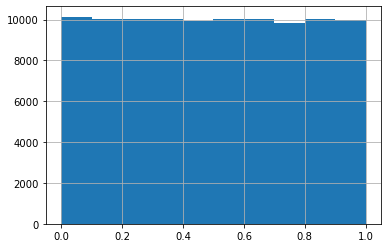

In [6]:
prior.hist()
plt.show()

Now it's time to observe some data and see how this affects our estimates. Suppose on the first day, 50 people visited our site and 10 of them made a purchase. We are going to record the number of purchases in a variable called observed.

In [7]:
observed = 10

Ware also going to create a generative model that will randomly draw from our prior uniform distribution, simulate 50 people coming to our website a large number of time, and see how many times we get a result that is in line with the result we have observed. To do this in Python, we are going to define a generative_model function that accepts a random probability parameter from our prior and then performs 50 binomial draws using that probability.

In [8]:
def generative_model(param):
    result = np.random.binomial(50, param)
    return result

We are going to create a empty list that is going to contain our simulated results (sim_data) and then populate it by appending the results when each value in our prior distribution is plugged into our generative model.

In [9]:
sim_data = list()

for p in prior:
    sim_data.append(generative_model(p))

Finally, we are going to arrive at our posterior distribution by selecting only the values from our prior distribution that generated instances where the simulated result matched our observed result of 10 purchases.



In [10]:
posterior = prior[list(map(lambda x: x == observed, sim_data))]

Below is what our posterior distribution looks like.

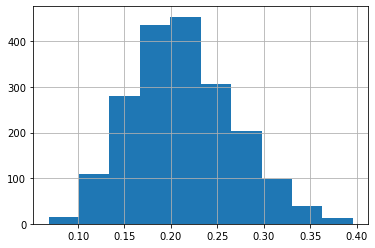

In [11]:
posterior.hist()
plt.show()

We can see just by looking at this that the updated probability of someone making a purchase from our online store is likely between 10% and 30% and most likely somewhere between 17% and 20%.

We can also calculate some statistics for our posterior distribution in addition to visualizing it. This will show us the mean, range, and standard deviation of our posterior distribution in addition to the quartiles.

In [12]:
posterior.describe()

count    1955.000000
mean        0.212462
std         0.055567
min         0.068211
25%         0.173255
50%         0.208089
75%         0.247054
max         0.395946
dtype: float64

We can see that both the mean and the median are approximately 21%. If we wanted to, we could also calculate a 90% credible interval for this distribution as follows.

In [13]:
print(posterior.quantile(.025), '|', posterior.quantile(.975))

0.11571977896426386 | 0.33104320377549207


Finally, we could also round the values in the posterior distribution to whole percents and calculate the most likely one along with its probability. This is known as the maximum likelihood estimate.

In [14]:
rounded = posterior.round(2)
mode = rounded.mode()[0]
probability = list(rounded).count(mode)/len(rounded)
print('Maximum Likelihood Estimate: ', mode, '|',probability)

Maximum Likelihood Estimate:  0.21 | 0.08081841432225063


This tells us that given the data we have thus far, it is most likely that 18% of the visitors to our online store will make a purchase.